In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cosmo

FlatLambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)

In [19]:
a = np.logspace(0, -6)
z = 1/a - 1

In [20]:
OmegaM = cosmo.Om(z)
OmegaL = cosmo.Ode(z)
OmegaT = cosmo.Otot(z)

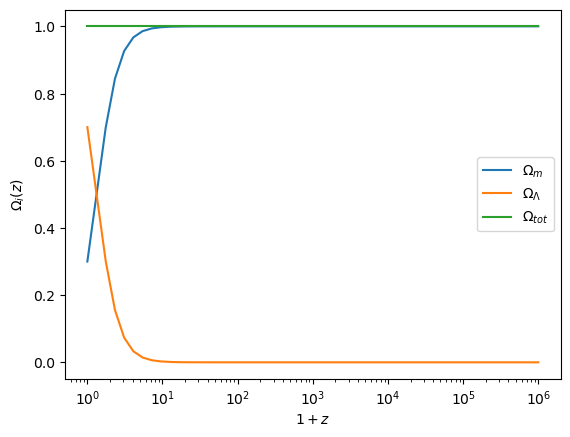

In [21]:
plt.plot(z+1, OmegaM, label="$\Omega_m$")
plt.plot(z+1, OmegaL, label="$\Omega_\Lambda$")
plt.plot(z+1, OmegaT, label="$\Omega_{tot}$")
plt.xscale("log")
plt.xlabel("$1+z$")
plt.ylabel("$\Omega_i(z)$")
plt.legend()
plt.show()

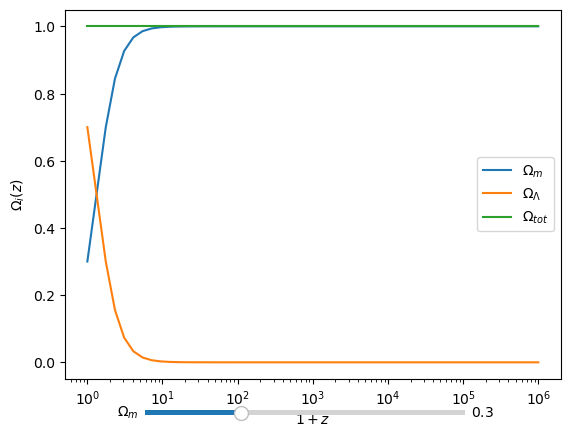

In [26]:
from matplotlib.widgets import Slider

fig, ax = plt.subplots()

initial_omegam = .5
pm, = plt.plot(z+1, OmegaM, label="$\Omega_m$")
pl, = plt.plot(z+1, OmegaL, label="$\Omega_\Lambda$")
plt.plot(z+1, OmegaT, label="$\Omega_{tot}$")
plt.xscale("log")
plt.xlabel("$1+z$")
plt.ylabel("$\Omega_i(z)$")
plt.legend()

axamp = plt.axes([0.25, .03, 0.50, 0.02])
# Slider
samp = Slider(axamp, '$\Omega_m$', 0, 1, valinit=0.3)

def update(val):
    # amp is the current value of the slider
    om = samp.val
    cosmo = FlatLambdaCDM(H0=70, Om0=om)
    # update curve
    pm.set_ydata(cosmo.Om(z))
    # redraw canvas while idle
    fig.canvas.draw_idle()

# call update function on slider value change
samp.on_changed(update)

plt.show()


In [27]:
import ipywidgets as widgets
widgets.IntSlider()

IntSlider(value=0)